In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
df = pd.read_csv("preprocessed_cyberbullying_data (1).csv")
df.dropna(subset=['cleaned_text'], inplace=True)


In [5]:
# Convert cleaned text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']


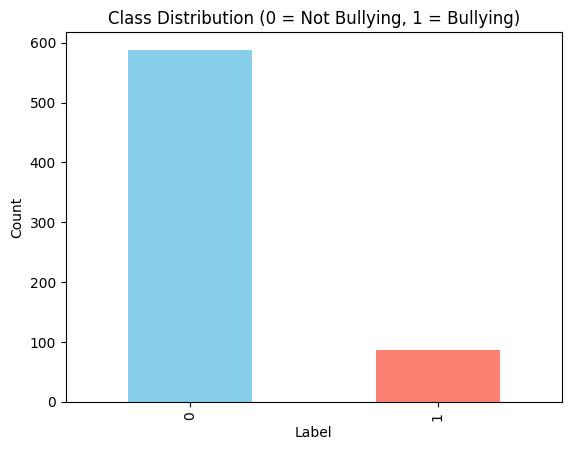

In [6]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution (0 = Not Bullying, 1 = Bullying)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)




 Classification Report:

              precision    recall  f1-score   support

Not Bullying       0.91      0.91      0.91       118
    Bullying       0.39      0.41      0.40        17

    accuracy                           0.84       135
   macro avg       0.65      0.66      0.66       135
weighted avg       0.85      0.84      0.85       135



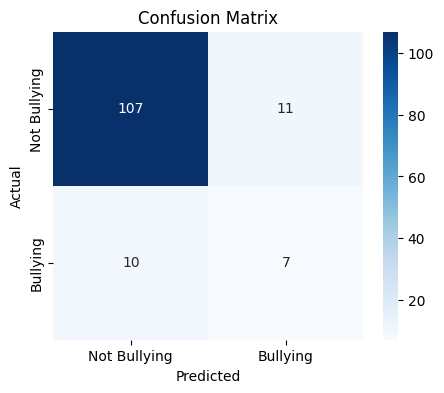

In [9]:
y_pred = model.predict(X_test)

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred_log, target_names=["Not Bullying", "Bullying"]))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Not Bullying", "Bullying"],
            yticklabels=["Not Bullying", "Bullying"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [11]:
# Print main evaluation metrics
print(" Accuracy:", accuracy_score(y_test, y_pred_log))
print(" Precision:", precision_score(y_test, y_pred_log))
print(" Recall:", recall_score(y_test, y_pred_log))
print(" F1 Score:", f1_score(y_test, y_pred_log))

 Accuracy: 0.8444444444444444
 Precision: 0.3888888888888889
 Recall: 0.4117647058823529
 F1 Score: 0.4


SVC

In [12]:
from sklearn.svm import SVC

In [13]:
svc_model = SVC(kernel='linear', class_weight='balanced', probability=True)
svc_model.fit(X_train, y_train)


SVC(class_weight='balanced', kernel='linear', probability=True)

📊 Classification Report:

              precision    recall  f1-score   support

Not Bullying       0.90      0.94      0.92       118
    Bullying       0.42      0.29      0.34        17

    accuracy                           0.86       135
   macro avg       0.66      0.62      0.63       135
weighted avg       0.84      0.86      0.85       135



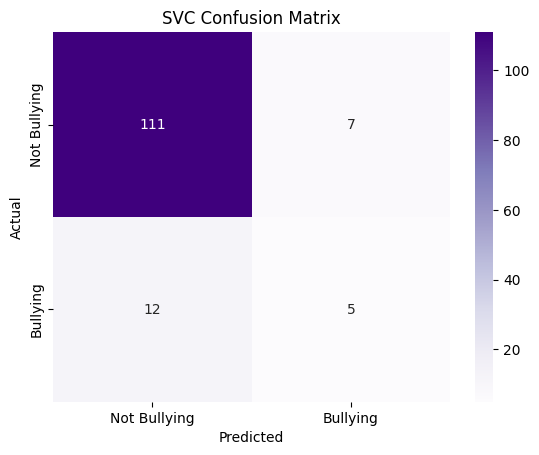

In [14]:
y_pred_svc = svc_model.predict(X_test)

# Classification metrics
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred_svc, target_names=["Not Bullying", "Bullying"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples",
            xticklabels=["Not Bullying", "Bullying"],
            yticklabels=["Not Bullying", "Bullying"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVC Confusion Matrix")
plt.show()


In [15]:
# Print main evaluation metrics
print(" Accuracy:", accuracy_score(y_test, y_pred_svc))
print(" Precision:", precision_score(y_test, y_pred_svc))
print(" Recall:", recall_score(y_test, y_pred_svc))
print(" F1 Score:", f1_score(y_test, y_pred_svc))

 Accuracy: 0.8592592592592593
 Precision: 0.4166666666666667
 Recall: 0.29411764705882354
 F1 Score: 0.3448275862068966


LSTM model

In [16]:
!pip install tensorflow

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Parameters
embedding_dim = 64
vocab_size = 5000
max_length = 100

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7942 - loss: 0.5979 - val_accuracy: 0.8741 - val_loss: 0.3806
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8843 - loss: 0.3615 - val_accuracy: 0.8741 - val_loss: 0.3786
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8893 - loss: 0.3567 - val_accuracy: 0.8741 - val_loss: 0.3833
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8627 - loss: 0.4045 - val_accuracy: 0.8741 - val_loss: 0.3800
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8805 - loss: 0.3570 - val_accuracy: 0.8741 - val_loss: 0.3788


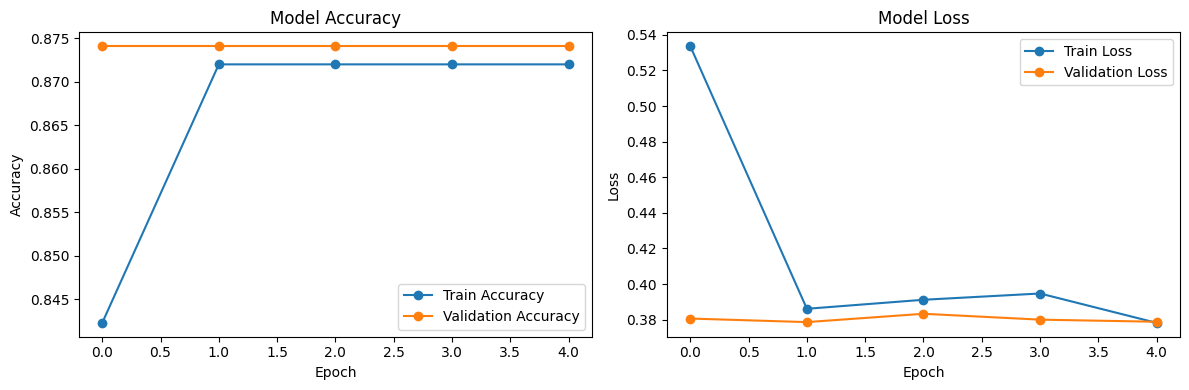

In [18]:
import matplotlib.pyplot as plt

# Plot training vs validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 702ms/step
 Classification Report:

              precision    recall  f1-score   support

Not Bullying       0.87      1.00      0.93       118
    Bullying       0.00      0.00      0.00        17

    accuracy                           0.87       135
   macro avg       0.44      0.50      0.47       135
weighted avg       0.76      0.87      0.82       135

 Confusion Matrix:
 [[118   0]
 [ 17   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


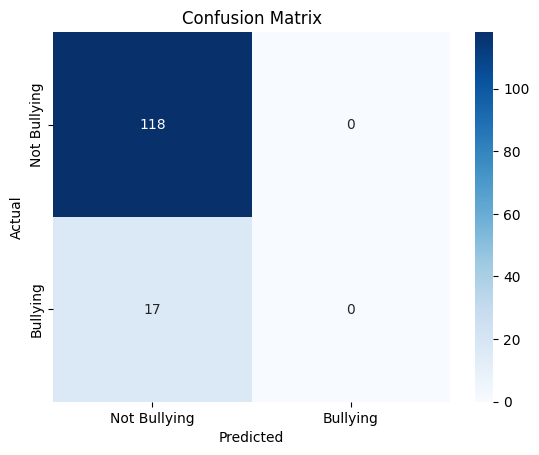

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Bullying", "Bullying"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(" Confusion Matrix:\n", conf_matrix)

# Optional: Plot Confusion Matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Not Bullying", "Bullying"],
            yticklabels=["Not Bullying", "Bullying"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
# Print main evaluation metrics
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))

 Accuracy: 0.8740740740740741
 Precision: 0.0
 Recall: 0.0
 F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ensemble Model- Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
rf_model = RandomForestClassifier(n_estimators=100,   max_depth=10,class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

 Classification Report:

              precision    recall  f1-score   support

Not Bullying       0.90      0.97      0.93       118
    Bullying       0.56      0.29      0.38        17

    accuracy                           0.88       135
   macro avg       0.73      0.63      0.66       135
weighted avg       0.86      0.88      0.87       135



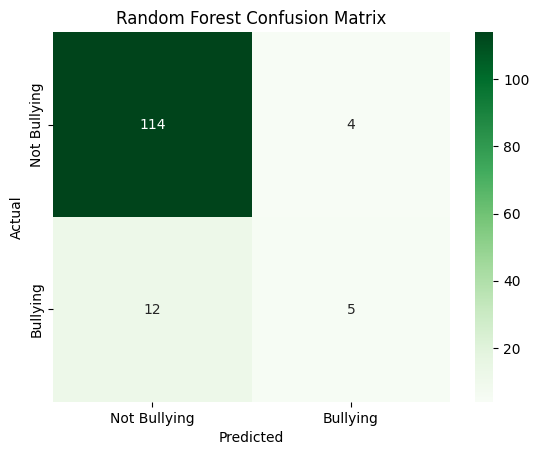

In [23]:
y_pred_rf = rf_model.predict(X_test)

print(" Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=["Not Bullying", "Bullying"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens",
            xticklabels=["Not Bullying", "Bullying"],
            yticklabels=["Not Bullying", "Bullying"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [24]:
# Print main evaluation metrics
print(" Accuracy:", accuracy_score(y_test, y_pred_rf))
print(" Precision:", precision_score(y_test, y_pred_rf))
print(" Recall:", recall_score(y_test, y_pred_rf))
print(" F1 Score:", f1_score(y_test, y_pred_rf))

 Accuracy: 0.8814814814814815
 Precision: 0.5555555555555556
 Recall: 0.29411764705882354
 F1 Score: 0.38461538461538464


Voting Classifier (combining Logistic + SVC + RandomForest)

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Defining base models
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
svc = SVC(kernel='linear', class_weight='balanced', probability=True)
rf = RandomForestClassifier(class_weight='balanced')

# Voting Ensemble
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg),
    ('svc', svc),
    ('rf', rf)
], voting='soft',weights=[2, 1, 1])

# Train
voting_clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred_clf = voting_clf.predict(X_test)
print(" Voting Classifier Report:\n")
print(classification_report(y_test, y_pred_clf))


 Voting Classifier Report:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       118
           1       0.50      0.12      0.19        17

    accuracy                           0.87       135
   macro avg       0.69      0.55      0.56       135
weighted avg       0.84      0.87      0.84       135



In [42]:
# Print main evaluation metrics
print(" Accuracy:", accuracy_score(y_test, y_pred_clf))
print(" Precision:", precision_score(y_test, y_pred_clf))
print(" Recall:", recall_score(y_test, y_pred_clf))
print(" F1 Score:", f1_score(y_test, y_pred_clf))

 Accuracy: 0.8740740740740741
 Precision: 0.5
 Recall: 0.11764705882352941
 F1 Score: 0.19047619047619047


Xgboost

In [26]:
!pip install xgboost


In [43]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)


 XGBoost Classification Report:

              precision    recall  f1-score   support

Not Bullying       0.90      0.95      0.92       118
    Bullying       0.40      0.24      0.30        17

    accuracy                           0.86       135
   macro avg       0.65      0.59      0.61       135
weighted avg       0.83      0.86      0.84       135



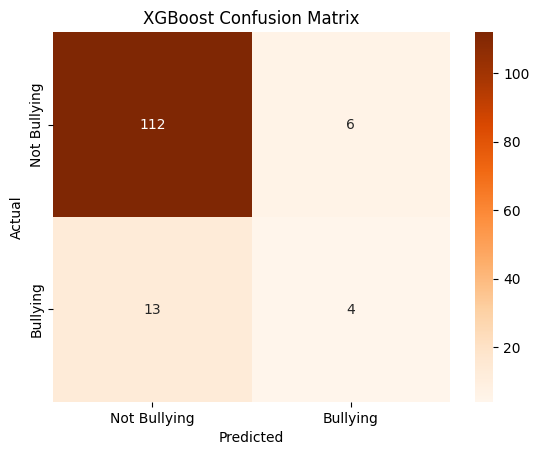

In [44]:
# Classification report
print(" XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=["Not Bullying", "Bullying"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges",
            xticklabels=["Not Bullying", "Bullying"],
            yticklabels=["Not Bullying", "Bullying"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


In [45]:
# Print main evaluation metrics
print(" Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(" Precision:", precision_score(y_test, y_pred_xgb))
print(" Recall:", recall_score(y_test, y_pred_xgb))
print(" F1 Score:", f1_score(y_test, y_pred_xgb))

 Accuracy: 0.8592592592592593
 Precision: 0.4
 Recall: 0.23529411764705882
 F1 Score: 0.2962962962962963
